<a href="https://colab.research.google.com/github/nik0laygavrIlov/DA_ML_repo/blob/main/Analysis_howpop_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Анализ датасета howpop_train

## Первичный анализ данных

Загрузим датасет howpop_train

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

url = 'https://drive.google.com/file/d/10NEWAf3gsZNYr9s6kmsUtpLeLcuKV1h9/view'
file_id = url.split('/')[-2]
dwn_url = 'https://drive.google.com/uc?id=' + file_id
howpop_train = pd.read_csv(dwn_url,
                           parse_dates=['published'],
                           )

Выведем первые 10 строк датасета

In [ ]:
howpop_train.head(10)

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm
0,https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,0,236,0.0,0.0,-0.792687,-1.344075,-2.436871
1,https://habrahabr.ru/post/18285/,habrahabr.ru,18285,2008-01-01 18:30:00,@DezmASter,design,False,7344,"Сумасшедшие яйца, или сервис для отслеживания ...",1,1,353,1.0,0.0,-0.485214,-0.831946,-1.873193
2,https://habrahabr.ru/post/18286/,habrahabr.ru,18286,2008-01-01 18:34:00,@DezmASter,design,False,8431,"Сумасшедшие яйца, или сервис для отслеживания ...",47,72,1200,45.0,5.0,0.446090,1.794023,0.574656
3,https://habrahabr.ru/post/18291/,habrahabr.ru,18291,2008-01-02 01:32:00,@Taoorus,design,False,5662,"Сглаживание шрифтов, и субпиксельная отрисовка",102,36,5700,72.0,3.0,1.627469,1.300050,1.167375
4,https://geektimes.ru/post/18294/,geektimes.ru,18294,2008-01-02 14:34:00,@dennydo,NaN,False,3706,Почему мне не нравится iPhone,230,6,1400,73.0,15.0,1.362397,0.961094,2.020356
5,https://habrahabr.ru/post/18295/,habrahabr.ru,18295,2008-01-02 16:14:00,@lvea,develop,False,3171,Mobile2.0 Всеобщая доступность,22,1,192,9.0,2.0,-0.950075,-0.825149,0.016555
6,https://geektimes.ru/post/18306/,geektimes.ru,18306,2008-01-03 12:55:00,@abbasov,NaN,False,435,Modbook в действии,10,0,301,5.0,1.0,-0.402140,-1.278643,-0.355525
7,https://habrahabr.ru/post/18311/,habrahabr.ru,18311,2008-01-03 17:20:00,@Andrey,misc,False,3291,В чем суть проекта Vladelia.ru,64,1,141,17.0,20.0,-1.168569,-0.822414,0.801626
8,https://habrahabr.ru/post/31352/,habrahabr.ru,31352,2008-01-03 22:54:00,@kvladimir,develop,False,1953,Подтверждено: Wikia Search запускается в понед...,23,2,208,21.0,3.0,-0.878984,-0.525245,0.041000
9,https://habrahabr.ru/post/18314/,habrahabr.ru,18314,2008-01-03 23:56:00,@lvea,develop,False,3712,Mobile 2.0 Выбор предпочтительного способа связи,6,1,401,2.0,0.0,-0.389766,-0.817507,-0.896510


Посмотрим, в каких столбцах датасета есть пропуски, и сколько их, а также какие типы данных кождого столбца

In [ ]:
howpop_train.isna().sum()

,0
url,0
domain,0
post_id,0
published,0
author,36480
flow,37089
polling,0
content_len,0
title,0
comments,0


Как видим, пропуски есть в столбцах author, flow, votes_plus и votes_minus.

Вычислим отношение числа строк с пропусками к числу строк без пропусков

In [ ]:
howpop_train.isna().sum() / howpop_train.notna().sum()

,0
url,0.000000
domain,0.000000
post_id,0.000000
published,0.000000
author,0.373552
flow,0.382172
polling,0.000000
content_len,0.000000
title,0.000000
comments,0.000000


Столбцы domain, post_id, author, title не вносят никакой информации для анализа. Удалим их.
Пропуски в столбце flow заменим на not_defined.

In [ ]:
(howpop_train['votes_plus'].isna() & howpop_train['votes_minus'].isna()).sum()

571

Как видим, число пропусков в столбцах votes_minus и votes_plus совпадает с числом пропусков в каждом из столбцов. Поскольку доля таких строк составляет около 0,4 %, их удаление не окажет влияния на нашу выборку. Сделаем это

In [ ]:
howpop_train = howpop_train.drop(columns=['domain', 'post_id', 'author', 'title'])
howpop_train = howpop_train[howpop_train['votes_minus'].notna()]
howpop_train['flow'] = howpop_train['flow'].fillna('not_defined')

Проверим, что пропуски удалились

In [ ]:
howpop_train.isna().sum()

,0
url,0
published,0
flow,0
polling,0
content_len,0
comments,0
favs,0
views,0
votes_plus,0
votes_minus,0


Проверим даты в столбце published на адекватность

In [ ]:
howpop_train['published'].max()

Timestamp('2016-10-31 23:56:00')

In [ ]:
howpop_train['published'].min()

Timestamp('2008-01-01 18:19:00')

Посмотрим, какие направления (flow) остались в очищенном датасете

In [ ]:
howpop_train['flow'].unique()

array(['develop', 'design', 'not_defined', 'misc', 'management', 'admin',
       'marketing'], dtype=object)

Еще раз посмотрим на очищенный датасет

In [ ]:
howpop_train.sample(n=10)

,url,published,flow,polling,content_len,comments,favs,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm
77181,https://habrahabr.ru/post/205308/,2013-12-09 11:50:00,develop,False,16433,4,131,18800,13.0,1.0,0.131543,0.740440,-0.836194
92062,https://habrahabr.ru/post/243605/,2014-11-19 06:37:00,marketing,False,14328,14,148,8200,15.0,12.0,-0.615996,0.560365,0.133203
133065,https://geektimes.ru/post/281348/,2016-10-11 09:28:00,not_defined,False,7284,150,29,46100,41.0,6.0,1.590704,0.160000,1.297514
70881,https://habrahabr.ru/post/187512/,2013-07-23 10:35:00,develop,False,4398,7,51,7200,10.0,4.0,-0.773647,0.084190,-0.570634
118683,https://geektimes.ru/post/269364/,2016-01-19 08:51:00,not_defined,False,3158,33,19,19500,26.0,3.0,0.912253,0.065910,0.831973
126626,https://habrahabr.ru/company/ultima/blog/301582/,2016-05-24 13:12:00,marketing,False,7615,2,18,1200,4.0,7.0,-1.883257,-0.408643,-0.691893
88189,https://habrahabr.ru/post/288426/,2014-08-30 14:51:00,management,False,3082,33,26,33500,52.0,10.0,0.668989,-0.839737,0.618166
71820,https://habrahabr.ru/post/190068/,2013-08-14 19:21:00,admin,False,6494,10,35,13800,11.0,3.0,-0.234942,-0.235096,-0.334133
68029,https://habrahabr.ru/company/softwarepeople/bl...,2013-05-14 12:36:00,develop,False,2347,0,1,1300,2.0,1.0,-2.230049,-2.431794,-2.289493
74714,https://habrahabr.ru/company/uprock/blog/198132/,2013-10-18 18:43:00,design,False,11691,7,216,17500,21.0,7.0,0.025908,1.083591,-0.556653


In [ ]:
howpop_train.columns

Index(['url', 'published', 'flow', 'polling', 'content_len', 'comments',
       'favs', 'views', 'votes_plus', 'votes_minus', 'views_lognorm',
       'favs_lognorm', 'comments_lognorm'],
      dtype='object')

Построим распределения величин 'content_len', 'comments', 'favs', 'views', 'votes_plus', 'votes_minus', 'views_lognorm', 'favs_lognorm', 'comments_lognorm'

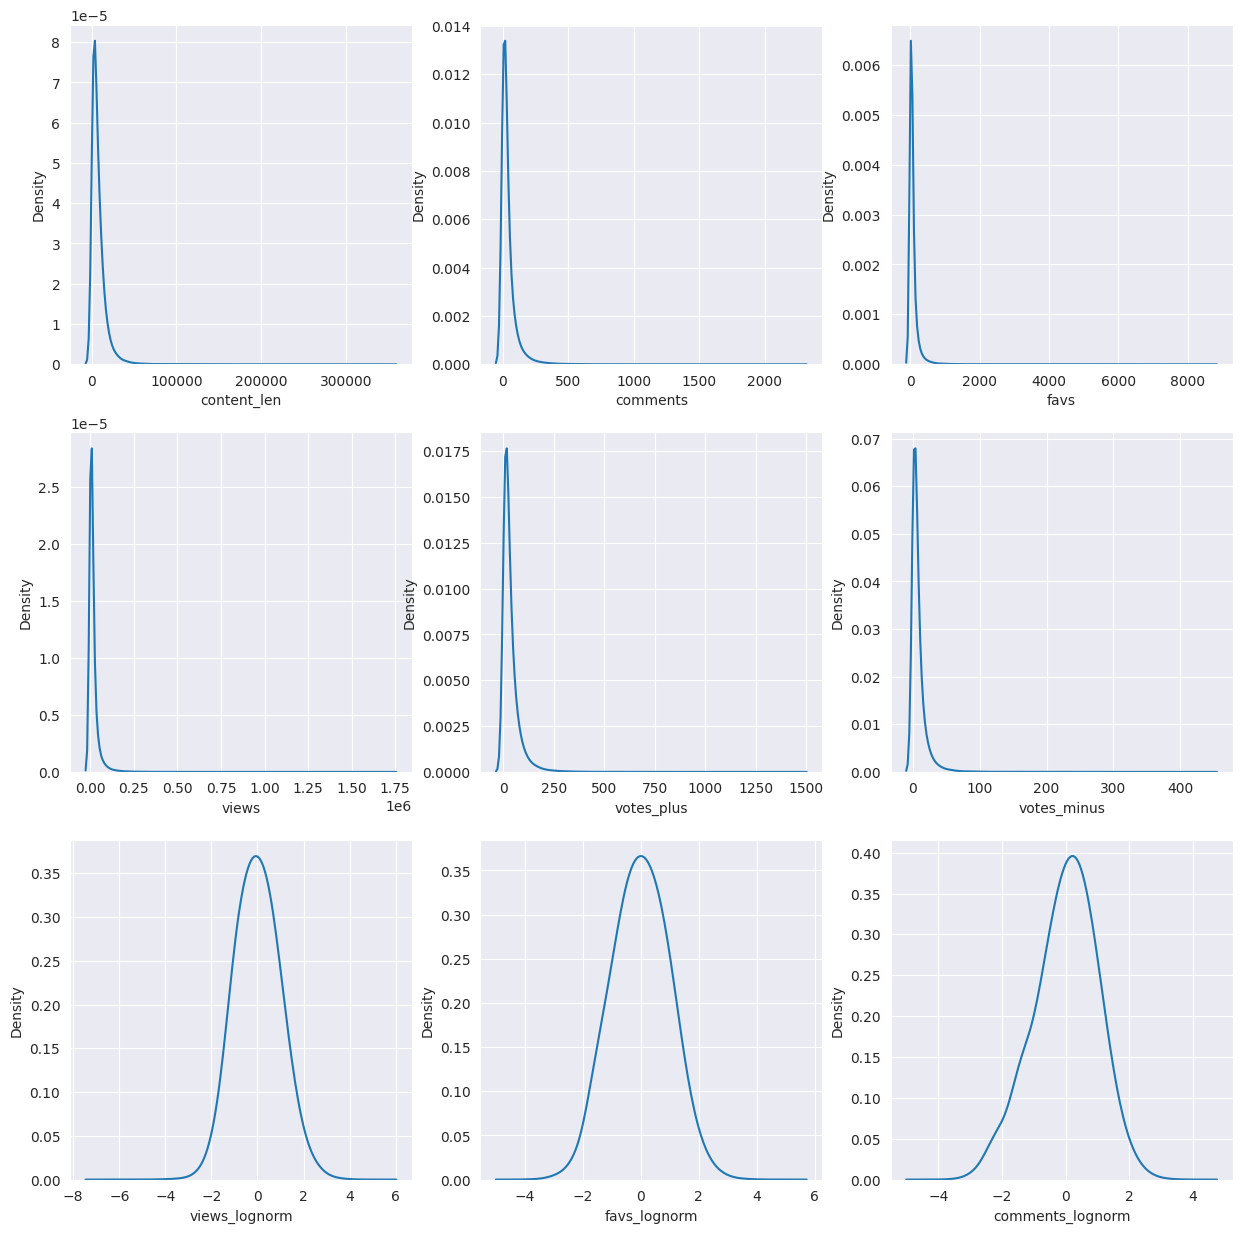

In [ ]:
# Выберем стиль графиков
sns.set_style("darkgrid")
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for ind, column in np.ndenumerate(np.array(howpop_train.columns[4:13]).reshape(3, 3)):
    sns.kdeplot(howpop_train[column], ax=axes[ind], bw_adjust=3)


Заметим, что нам удобнее работать с признаками 'views_lognorm', 'favs_lognorm' 'comments_lognorm', чем с 'comments', 'favs', 'views', так как их распределения похожи на нормальные.

Создадим столбец votes с общим числом реакций, как негативных, так и позитивных. Создадим столбцы votes_lognorm и content_len_lognorm и построим их распределения

In [ ]:
howpop_train['votes'] = howpop_train['votes_plus'] + howpop_train['votes_minus']
howpop_train['votes_lognorm'] = np.log(1 + howpop_train['votes'])
howpop_train['content_len_lognorm'] = np.log(1 + howpop_train['content_len'])

howpop_train.head(6)

,url,published,flow,polling,content_len,comments,favs,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm,votes,votes_lognorm,content_len_lognorm
0,https://habrahabr.ru/post/18284/,2008-01-01 18:19:00,develop,False,4305,0,0,236,0.0,0.0,-0.792687,-1.344075,-2.436871,0.0,0.000000,8.367765
1,https://habrahabr.ru/post/18285/,2008-01-01 18:30:00,design,False,7344,1,1,353,1.0,0.0,-0.485214,-0.831946,-1.873193,1.0,0.693147,8.901775
2,https://habrahabr.ru/post/18286/,2008-01-01 18:34:00,design,False,8431,47,72,1200,45.0,5.0,0.446090,1.794023,0.574656,50.0,3.931826,9.039789
3,https://habrahabr.ru/post/18291/,2008-01-02 01:32:00,design,False,5662,102,36,5700,72.0,3.0,1.627469,1.300050,1.167375,75.0,4.330733,8.641709
4,https://geektimes.ru/post/18294/,2008-01-02 14:34:00,not_defined,False,3706,230,6,1400,73.0,15.0,1.362397,0.961094,2.020356,88.0,4.488636,8.217978
5,https://habrahabr.ru/post/18295/,2008-01-02 16:14:00,develop,False,3171,22,1,192,9.0,2.0,-0.950075,-0.825149,0.016555,11.0,2.484907,8.062118


<Axes: title={'center': 'content_len_lognorm'}, ylabel='Density'>

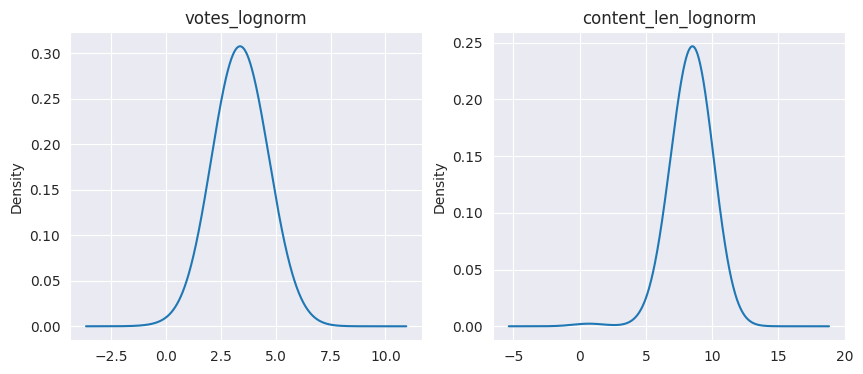

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

howpop_train['votes_lognorm'].plot.kde(ax=axes[0], title='votes_lognorm', bw_method=1)
howpop_train['content_len_lognorm'].plot.kde(ax=axes[1], title='content_len_lognorm', bw_method=1)

Распределения величин стали похожи на нормальные

## Проверка на нормальность

### Обработка выбросов

В предыдущем пункте мы выяснили, что данные столбцов 'views_lognorm', 'favs_lognorm', 'comments_lognorm', 'votes_lognorm' и 'content_len_lognorm' похожи на нормальные. Прежде чем подвергнуть их статистическим тестам, создадим отдельные датафреймы для каждого из этих столбцов, так как их выбросы, скорее всего, не связаны между собой. Выбросы будем искать по методу Тьюки

In [ ]:
def outliers_iqr(data, feature, log_scale=False, left=1.5, right=1.5):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

In [ ]:
for feature in ['views_lognorm', 'favs_lognorm', 'comments_lognorm', 'votes_lognorm', 'content_len_lognorm']:
    outliers = outliers_iqr(howpop_train, feature)[0]

    print(f'Число выбросов по методу Тьюки для {feature}: {outliers.shape[0]}')

Число выбросов по методу Тьюки для views_lognorm: 871
Число выбросов по методу Тьюки для favs_lognorm: 615
Число выбросов по методу Тьюки для comments_lognorm: 942
Число выбросов по методу Тьюки для votes_lognorm: 938
Число выбросов по методу Тьюки для content_len_lognorm: 1425


Число межквартильных размахов в обе стороны увеличим до 2

In [ ]:
for feature in ['views_lognorm', 'favs_lognorm', 'comments_lognorm', 'votes_lognorm', 'content_len_lognorm']:
    outliers = outliers_iqr(howpop_train, feature, left=2, right=2)[0]

    print(f'Число выбросов по методу Тьюки для {feature}: {outliers.shape[0]}')

Число выбросов по методу Тьюки для views_lognorm: 177
Число выбросов по методу Тьюки для favs_lognorm: 70
Число выбросов по методу Тьюки для comments_lognorm: 49
Число выбросов по методу Тьюки для votes_lognorm: 312
Число выбросов по методу Тьюки для content_len_lognorm: 993


Посмотрим, насколько изменилось число выбросов для данных каждого столбца

In [ ]:
for feature in ['views_lognorm', 'favs_lognorm', 'comments_lognorm', 'votes_lognorm', 'content_len_lognorm']:
    outliers_2IQR = outliers_iqr(howpop_train, feature, left=2, right=2)[0]
    outliers_1_5IQR = outliers_iqr(howpop_train, feature)[0]
    ratio = - (outliers_2IQR.shape[0] - outliers_1_5IQR.shape[0]) / outliers_1_5IQR.shape[0]

    print(f'Число выбросов по методу Тьюки для {feature}: {ratio}')

Число выбросов по методу Тьюки для views_lognorm: 0.7967853042479908
Число выбросов по методу Тьюки для favs_lognorm: 0.8861788617886179
Число выбросов по методу Тьюки для comments_lognorm: 0.9479830148619958
Число выбросов по методу Тьюки для votes_lognorm: 0.6673773987206824
Число выбросов по методу Тьюки для content_len_lognorm: 0.3031578947368421


Отсюда видим, что выбросы признаков 'views_lognorm', 'favs_lognorm', 'comments_lognorm' наиболее чувствительны к изменению коэффициента при межквартильном расстоянии, что говорит в пользу их нормального распределения.

### Тесты на нормальность

Поскольку выборки 'views_lognorm', 'favs_lognorm', 'comments_lognorm' очень большие, будем использовать в качестве статистических критериев тесты Д'Агостино.

Так как у нас есть сомнения в нормальности распределений 'votes_lognorm' и 'content_len_lognorm' исследуем их с помощью теста Харке-Бера, так как он более чувствителен к принятию альтернативной гипотезы (согласно документации)

In [ ]:
def pvalue(data, feature):
  sample = np.array(outliers_iqr(howpop_train, feature)[1][feature])
  if feature in ['views_lognorm', 'favs_lognorm', 'comments_lognorm']:
    print(f'p-value {feature} по Д\'Агостино: {sp.stats.normaltest(sample).pvalue}')
  elif feature in ['votes_lognorm', 'content_len_lognorm']:
    print(f'p-value {feature} по Харке-Бера: {sp.stats.jarque_bera(sample).pvalue}')
  else:
    pass

for feature in ['views_lognorm', 'favs_lognorm', 'comments_lognorm', 'votes_lognorm', 'content_len_lognorm']:
  pvalue(howpop_train, feature)

p-value views_lognorm по Д'Агостино: 2.0158091443362665e-237
p-value favs_lognorm по Д'Агостино: 9.734631877783773e-295
p-value comments_lognorm по Д'Агостино: 0.0
p-value votes_lognorm по Харке-Бера: 4.8728866818107304e-194
p-value content_len_lognorm по Харке-Бера: 0.0


В каждом из тестов получили значение p-value, равное машинному нулю. Следовательно, для каждого из признаков гипотезу о нормальности распределения отвергаем.
Действительно, ядерная оценка плотности сглаживает отклонения от нормального распределения, что видно на следующей гистограмме

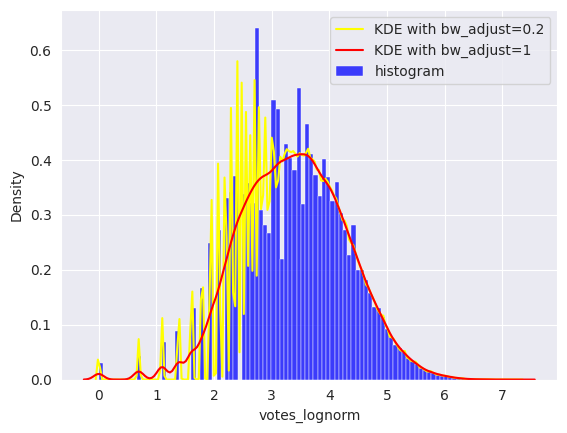

In [ ]:
import matplotlib

fig, ax1 = plt.subplots()

sns.kdeplot(howpop_train['votes_lognorm'], ax=ax1, color='yellow', bw_adjust=0.2, label='KDE with bw_adjust=0.2')
sns.kdeplot(howpop_train['votes_lognorm'], ax=ax1, color='red', bw_adjust=1, label='KDE with bw_adjust=1')
sns.histplot(howpop_train['votes_lognorm'], stat='density', bins=100, ax=ax1, color='blue', label='histogram')

ax1.legend(loc='upper right')

Поскольку все нулевые гипотезы о нормальности были отклонены, а параметрические тесты работают только с нормально распределенными данными, судя по всему, играет роль фактор времени, который мы прежде не учитывали.

Добавим столбцы год и месяц.

In [ ]:
howpop_train['year'] = howpop_train['published'].dt.year
howpop_train['month'] = howpop_train['published'].dt.month
howpop_train.head(10)

,url,published,flow,polling,content_len,comments,favs,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm,votes,votes_lognorm,content_len_lognorm,year,month
0,https://habrahabr.ru/post/18284/,2008-01-01 18:19:00,develop,False,4305,0,0,236,0.0,0.0,-0.792687,-1.344075,-2.436871,0.0,0.000000,8.367765,2008,1
1,https://habrahabr.ru/post/18285/,2008-01-01 18:30:00,design,False,7344,1,1,353,1.0,0.0,-0.485214,-0.831946,-1.873193,1.0,0.693147,8.901775,2008,1
2,https://habrahabr.ru/post/18286/,2008-01-01 18:34:00,design,False,8431,47,72,1200,45.0,5.0,0.446090,1.794023,0.574656,50.0,3.931826,9.039789,2008,1
3,https://habrahabr.ru/post/18291/,2008-01-02 01:32:00,design,False,5662,102,36,5700,72.0,3.0,1.627469,1.300050,1.167375,75.0,4.330733,8.641709,2008,1
4,https://geektimes.ru/post/18294/,2008-01-02 14:34:00,not_defined,False,3706,230,6,1400,73.0,15.0,1.362397,0.961094,2.020356,88.0,4.488636,8.217978,2008,1
5,https://habrahabr.ru/post/18295/,2008-01-02 16:14:00,develop,False,3171,22,1,192,9.0,2.0,-0.950075,-0.825149,0.016555,11.0,2.484907,8.062118,2008,1
6,https://geektimes.ru/post/18306/,2008-01-03 12:55:00,not_defined,False,435,10,0,301,5.0,1.0,-0.402140,-1.278643,-0.355525,6.0,1.945910,6.077642,2008,1
7,https://habrahabr.ru/post/18311/,2008-01-03 17:20:00,misc,False,3291,64,1,141,17.0,20.0,-1.168569,-0.822414,0.801626,37.0,3.637586,8.099251,2008,1
8,https://habrahabr.ru/post/31352/,2008-01-03 22:54:00,develop,False,1953,23,2,208,21.0,3.0,-0.878984,-0.525245,0.041000,24.0,3.218876,7.577634,2008,1
9,https://habrahabr.ru/post/18314/,2008-01-03 23:56:00,develop,False,3712,6,1,401,2.0,0.0,-0.389766,-0.817507,-0.896510,2.0,1.098612,8.219595,2008,1


In [ ]:
howpop_train['year'].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype=int32)

In [ ]:
howpop_train[howpop_train['year'] == 2015]['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

In [ ]:
howpop_train[(howpop_train['year'] == 2016) & (howpop_train['month'] == 10)]['url'].count()

1493

Нам удалось вычленить выборку размером, в 100 раз меньшим исходной. Проверим ее на нормальность.

* H_0 - данные распределены нормально
* H_1 - данные не распределены нормально

In [ ]:
cont_len_in_10_2016 = howpop_train[(howpop_train['year'] == 2016) & (howpop_train['month'] == 10)]
cont_len_in_10_2016_cleaned = outliers_iqr(cont_len_in_10_2016, 'content_len_lognorm')[1]

print(f"p-value content_len по Д\'Агостино: {sp.stats.normaltest(np.array(cont_len_in_10_2016_cleaned['content_len_lognorm'])).pvalue}")

p-value content_len по Д'Агостино: 0.7048500345389623


Данный тест показывает, что с уровнем значимости alpha = 0,01 мы не можем отклонить нулевую гипотезу о том, что данные распределены нормально

Напишем функцию которая проверит, какие признаки распределены преимущественно нормально по месяцам

In [ ]:
def normality(data, features):
  # общее число месяцев
  k = 0
  n_month = 8 * 12
  for feature in features:
    for year in range(2008, 2017):
      for month in range(1, 13):
        data_ym = data[(data['year'] == year) & (data['month'] == month)]
        if data_ym.empty:
          continue
        cleaned = outliers_iqr(data_ym, feature)[1]
        res = sp.stats.normaltest(np.array(cleaned[feature])).pvalue
        if res >= 0.05:
          k += 1
        else:
          pass
    print(f'Данные {feature} распределены нормально в {round(k / n_month, 3)}% месяцев')

In [ ]:
normality(howpop_train, ['views_lognorm', 'favs_lognorm', 'comments_lognorm', 'votes_lognorm', 'content_len_lognorm'])

Данные views_lognorm распределены нормально в 0.177% месяцев
Данные favs_lognorm распределены нормально в 0.271% месяцев
Данные comments_lognorm распределены нормально в 0.281% месяцев
Данные votes_lognorm распределены нормально в 0.448% месяцев
Данные content_len_lognorm распределены нормально в 0.615% месяцев


Теперь посмотрим по кварталам года

In [ ]:
def normality_1(data, features):
  # общее число месяцев
  k = 0
  n_month = 8 * 4
  for feature in features:
    for year in range(2008, 2017):
      for month in range(1, 13, 3):
        data_ym = data[(data['year'] == year) & ((data['month'] == month) |
                                                 (data['month'] == month + 1) |
                                                 (data['month'] == month + 2))]
        if data_ym.empty:
          continue
        cleaned = outliers_iqr(data_ym, feature)[1]
        res = sp.stats.normaltest(np.array(cleaned[feature])).pvalue
        if res >= 0.05:
          k += 1
        else:
          pass
    print(f'Данные {feature} распределены нормально в {round(k / n_month, 3)}% кварталов года')

In [ ]:
normality_1(howpop_train, ['views_lognorm', 'favs_lognorm', 'comments_lognorm', 'votes_lognorm', 'content_len_lognorm'])

Данные views_lognorm распределены нормально в 0.031% кварталов года
Данные favs_lognorm распределены нормально в 0.062% кварталов года
Данные comments_lognorm распределены нормально в 0.062% кварталов года
Данные votes_lognorm распределены нормально в 0.094% кварталов года
Данные content_len_lognorm распределены нормально в 0.156% кварталов года


Поиск по сезонам не дал удовлетворительного результата.

Остановимся на исследовании признака content_len_lognorm по месяцам.

Найдем самый удачный год для исследования: самым удачным годом будем считать то, в котором признак content_len_lognorm в наибольшем числе месяцев распределен нормально

In [ ]:
def best_year(data, features):
  n_month = 12
  A = []
  for feature in features:
    for year in range(2008, 2017):
      k = 0
      B = []
      for month in range(1, 13):
        data_ym = data[(data['year'] == year) & (data['month'] == month)]
        if data_ym.empty:
          continue
        cleaned = outliers_iqr(data_ym, feature)[1]
        res = sp.stats.normaltest(np.array(cleaned[feature])).pvalue
        if res >= 0.05:
          k += 1
          B.append(month)
    A.append((year, k / n_month, B))
    best= max(enumerate(A), key=lambda x: x[1][1])
    print(f'Лучший год - {best[1][0]} \nВ нем данные распределены нормально в {round(best[1][1], 3)}% месяцев: {" ".join(map(str, best[1][2]))}')

In [ ]:
best_year(howpop_train, ['content_len_lognorm',])

Лучший год - 2016 
В нем данные распределены нормально в 0.417% месяцев: 6 7 8 9 10


## Проверка гипотез



Будем анализировать признак content_len_lognorm с июня по октябрь 2016 года.

Вначале построим гистограммы для данных по каждому месяцу на одном графике.

*   Новый пункт
*   Новый пункт



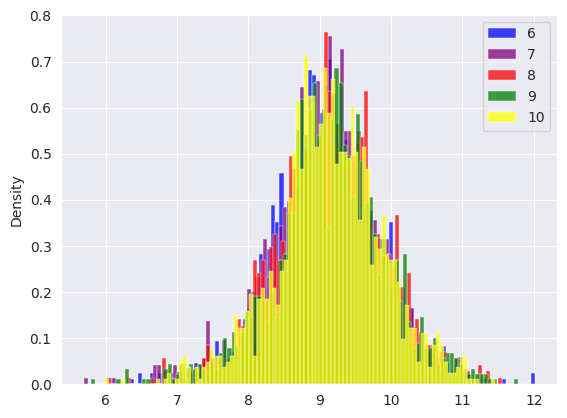

In [ ]:
howpop_train_2016 = howpop_train[howpop_train['year'] == 2016]
fig, ax1 = plt.subplots()

color = ['blue', 'purple', 'red', 'green', 'yellow']
k = 0
content_len_per_month = list()
for month in range(6, 11):
  content_len_per_month.append(np.array(howpop_train_2016[howpop_train_2016['month'] == month]['content_len_lognorm']))
  sns.histplot(content_len_per_month[k],
               stat='density',
               bins=100,
               ax=ax1, color=color[k],
               label=str(month))
  k += 1

ax1.legend()

Выясним, есть ли различия между средней длиной контента по месяцам с июня по октябрь 2016 года.

In [ ]:
H_0 = 'Нет значимой разницы между логарифмом средней длины контента по месяцам с июня по октябрь 2016 года.'
H_1 = 'Есть значимая разница между логарифмом средней длины по месяцам с июня по октябрь 2016 года.'

В качестве статистического теста будем использовать тест ANOVA.

Обоснование выбора теста:
* Зависимая переменная одна
* Групп несколько
* Зависимая переменная распределена нормально

In [ ]:
alpha = 0.05
_, p = sp.stats.f_oneway(content_len_per_month[0],
                content_len_per_month[1],
                content_len_per_month[2],
                content_len_per_month[3],
                content_len_per_month[4])

if p > alpha:
  print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу.\n{H_0}")
else:
  print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу.\n{H_1}")

0.06869784020288693 > 0.05. Мы не можем отвергнуть нулевую гипотезу.
Нет значимой разницы между логарифмом средней длины контента по месяцам с июня по октябрь 2016 года.


Проведем тест на нормальность по данным за все эти месяцы.

In [ ]:
data = howpop_train_2016[howpop_train_2016['month'].isin(range(6, 11))]

res = sp.stats.normaltest(np.array(outliers_iqr(data, 'content_len_lognorm')[1]['content_len_lognorm'])).pvalue
if res > alpha:
  print(f'Нет оснований отклонить H_0')
else:
  print(f'Данные не распределены нормально')

Нет оснований отклонить H_0


Поскольку у нас нет оснований полагать, что количества просмотров и favs распределены нормально, будем использовать непараметрический тест корреляции Спирмена

In [ ]:
data1 = howpop_train['favs']
data2 = howpop_train['views']

stat, p = sp.stats.spearmanr(data1, data2)
if p > alpha:
    print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу об отсутсвии зависимости между переменными.\nСтатистика теста - {stat}")
else:
    print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу об отсутсвии зависимости между переменными.\nСтатистика теста - {stat}")

0.0 <= 0.05. Мы отвергаем нулевую гипотезу об отсутсвии зависимости между переменными.
Статистика теста - 0.7111099082040638


Посмотрим среди статей каких рубрик эта взаимосвязь наиболее выражена

In [ ]:
for flow in howpop_train['flow'].unique():
  data1 = howpop_train[howpop_train['flow'] == flow]['favs']
  data2 = howpop_train[howpop_train['flow'] == flow]['views']

  stat, p = sp.stats.spearmanr(data1, data2)
  if p > alpha:
    print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу об отсутсвии зависимости между переменными в рубрике {flow}.\nСтатистика теста - {stat}")
  else:
    print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу об отсутсвии зависимости между переменными в рубрике {flow}.\nСтатистика теста - {stat}")

0.0 <= 0.05. Мы отвергаем нулевую гипотезу об отсутсвии зависимости между переменными в рубрике develop.
Статистика теста - 0.7419865312577312
0.0 <= 0.05. Мы отвергаем нулевую гипотезу об отсутсвии зависимости между переменными в рубрике design.
Статистика теста - 0.713714844027416
0.0 <= 0.05. Мы отвергаем нулевую гипотезу об отсутсвии зависимости между переменными в рубрике not_defined.
Статистика теста - 0.7154965893676042
0.0 <= 0.05. Мы отвергаем нулевую гипотезу об отсутсвии зависимости между переменными в рубрике misc.
Статистика теста - 0.6264832198387266
0.0 <= 0.05. Мы отвергаем нулевую гипотезу об отсутсвии зависимости между переменными в рубрике management.
Статистика теста - 0.61701393118962
0.0 <= 0.05. Мы отвергаем нулевую гипотезу об отсутсвии зависимости между переменными в рубрике admin.
Статистика теста - 0.7664879544580846
7.8875809427796e-311 <= 0.05. Мы отвергаем нулевую гипотезу об отсутсвии зависимости между переменными в рубрике marketing.
Статистика теста - 0

Как видим, взаимосвязь между количеством просмотров и количеством favs наиболее выражена в направлениях develop, design, admin и not_defined, причем наиболее выражена она именно в not_defined.

Посмотрим на тепловую карту корреляции всех признаков исходного датафрейма.

Text(0.5, 1.0, 'correlation between featers')

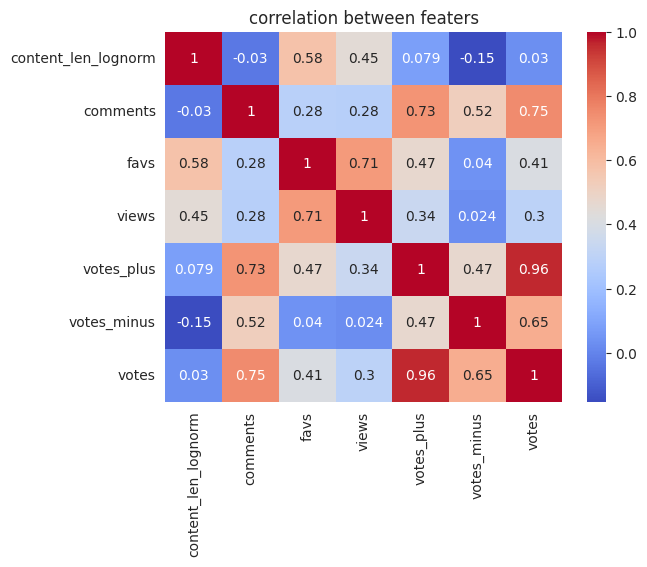

In [ ]:
corr = howpop_train[['content_len_lognorm', 'comments', 'favs', 'views',
                     'votes_plus', 'votes_minus', 'votes']].corr(method='spearman')

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('correlation between featers')

Проверим также взаимосвязь между количеством реакций и количеством комментариев

In [ ]:
data1 = howpop_train['comments']
data2 = howpop_train['votes']

stat, p = sp.stats.spearmanr(data1, data2)
if p > alpha:
    print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу об отсутсвии зависимости между переменными.\nСтатистика теста - {stat:.2f}")
else:
    print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу об отсутсвии зависимости между переменными.\nСтатистика теста - {stat:.2f}")

0.0 <= 0.05. Мы отвергаем нулевую гипотезу об отсутсвии зависимости между переменными.
Статистика теста - 0.75
